# Factory Machines classification (Fail/Normal)

### Supervised Learning

## Modelling objective

> To develop a **useful** and **accurate** model to perform *Binary Classification* on the status of Factory Machines, whether the machines fail or not.

##### Prediction task & Background research


> ***Can we utilize machine learning to help indicate which machine/component will fail before it actually fails?***

The factory dataset provided is collected from a manufacturing company
It includes environmental factors and conditions the machine is in, and behaviours of machines (Rotation speed, etc) <br>
> Our target variable for this problem is `Machine Status` - Each machine is identified as 'Normal' (0) or 'Failure' (1), Normal machines are functioning fine, while 'Failure' indicates faulty machine.

Hence, the problem task is binary classification, such that given a set of features of Machines, our goal is to classify whether the machine status is 'Normal' or 'Failure' accurately (whether they fail or not)

##### Machine Failure
1. Machine failure/malfunction describes machines that stop functioning in the way it was designed to.
2. In many cases, machine failures are usually unplanned, and might be the result of little to no maintenence, or even factors we cannot control directly such as wear and tear
#### **Understanding the financial cost of machine downtime in manufacturing**
3. Given the competitive manufacturing scene, it is only natural for businesses/companies to have their **functioning** machines working at full efficiency, such that productivity is maximised, leading to an increase in profits. However, machine failure/downtime is the biggest concern in every manufacturers mind. Negative impacts can include impact in production, productivity loss, or even jeopardizing the safety of workers.
4. Research shows that the average manufacturer deals with 800 hours of downtime per year, considering an average manufacturer losing 22,000 dollars per minute of downtime. This is indeed very shocking.
5. A study of major manufacturing firms was conducted, and it was discovered that large facilities lose '27 hours a month to machine failure, on average, at the cost of 532,000 dollars for each hour' of machine downtime.


To sum up, the cost of failure is much higher than its apparent cost.

**Utilizing machine learning to help**
1. Given the drastic impact machine failure can have, and ignoring the financial cost of downtime is not a viable option, we definitely need to recognize the significance of machine failure and the need to address the issue.

#### **Integrating the idea of predictive maintenance**
1. By leveraging on labelled data for predictive models, in our case (set of features for machines), companies can efficiently carry out and plan maintenance on machines so as to maximise machine uptime and operational efficiency
2. Discovering factors that contribute significantly to machine failure
3. Ultimately, the goal is to discover patterns that can help predict and prevent machine failures by providing early warnings. This can help to minimise loss.


### Interpretability of model (feature importance)

A understandable model is also useful for humans to understand. We hence want to models to be able to provide the importance of features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import plotly.express as px
%matplotlib inline
sns.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from scipy.cluster.hierarchy import dendrogram

In [3]:
# pip install phik

In [4]:
# Please install for EDA purposes
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

In [5]:
# Set random state/rng
rstate = np.random.RandomState(85)
# Setting random state for robustness of cross-validation results

SKLearn imports


In [6]:
# Model metric/ evaluation/selection, to see how well the model is doing
from sklearn.tree import export_graphviz,plot_tree
from sklearn.metrics import recall_score,classification_report,plot_roc_curve,f1_score, fbeta_score,balanced_accuracy_score
from sklearn.metrics import precision_score,SCORERS,make_scorer,roc_curve,accuracy_score, confusion_matrix,ConfusionMatrixDisplay,PrecisionRecallDisplay
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, learning_curve,validation_curve,KFold



# Classification models
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier


# For imputing missing values
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,Lasso,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVC


# Preprocessing
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,MaxAbsScaler, KBinsDiscretizer, MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder,QuantileTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import AgglomerativeClustering
# Base
from sklearn.base import TransformerMixin,BaseEstimator

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2,SelectFromModel,RFECV,f_classif

<h1>Reading of dataset</h1>

In [7]:
factory_df = pd.read_csv('datasets/factory_data.csv',na_values='?', sep=',')
# Null values denoted as ?
factory_df.head()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0


We note that there are both numerical variables and categorical variables

### Exploratory data analysis

We will be carrying out data exploration to further understand the characteristics of our data.
- Before building ML model

In [8]:
factory_EDA = factory_df.copy()

### Data dictionary *
| Column | Info |
| :--- | :--- |
| `Unique ID`| Unique identifier ranging from 1-20000| 
| `Product ID` | Serial number of product/machine|
| `Quality` | Describes the condition of machines (consits of `L`, `M`, `H`, `Low`, `Medium`, `High` respectively)|
| `Ambient T (C)` | Describes the environment temperature in degrees celcius|
| `Process T (C)` | Describes machine temperature in degrees celcius|
| `Rotation Speed (rpm)` | Rotational speed of running machine|
| `Torque (Nm)` | Measure of turning force of machine in Newton-metre|
| `Tool Wear (min)` | Tool wear time estimated for the machine to fail due to daily operations.|
|> `Machine Status` | Indicate if machine is normal or failure. 1(failure), 0(normal) |

We can note some observations
1. Dataset has 20000 rows, and 9 columns
2. We can see that for some columns', mean and median values are very similar, which may suggest a *symmetrical distribution*
3. Standard deviation for rotation speed is quite high, suggesting a high spread. (drastic jump from 75th percentile to max can be observed as well...)
4. Null values exist from 'Quality', 'Process T (C)', 'Rotation Speed (rpm)' columns



In [9]:
display(factory_EDA.info())
display(factory_EDA.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


None

,Unique ID,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
count,20000.000000,20000.000000,19600.000000,18812.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,26.904930,36.904291,1538.795397,39.986910,107.951000,0.033900
std,5773.647028,2.000834,1.483647,178.674963,9.968684,63.652555,0.180976
min,1.000000,22.150000,32.550000,1168.000000,3.800000,0.000000,0.000000
25%,5000.750000,25.250000,35.750000,1423.000000,33.200000,53.000000,0.000000
50%,10000.500000,26.950000,36.950000,1503.000000,40.100000,108.000000,0.000000
75%,15000.250000,28.450000,37.950000,1613.000000,46.800000,162.000000,0.000000
max,20000.000000,31.450000,40.750000,2886.000000,76.600000,253.000000,1.000000


## Observations from `ID` columns

We note that `Unique ID` has 20000 unique rows, and likely a representation of each unique row number, and likely does not help our prediction.

> Given this, we can consider to drop the Unique ID column as it does not really provide much information towards target variable.

`Product ID` although does not appear to directly tell us anything more about the target variable, but it may be useful later on

In [10]:
print(len(np.unique(factory_EDA['Unique ID'])) == len(factory_EDA))
print(factory_EDA['Unique ID'].nunique())
print(factory_EDA['Product ID'].nunique())
display(pd.DataFrame(factory_EDA['Product ID'].head()))
factory_EDA['Product ID'].value_counts().head().to_frame()
# 20000 unique values.

True
20000
19408


,Product ID
0,K12965
1,Z62710
2,T20224
3,Z33024
4,Z52839


,Product ID
K48630,3
T21950,3
Z37061,3
K34631,3
K81948,3


We notice some machines have duplicate product ID, lets explore further

In [11]:
factory_EDA[factory_EDA['Product ID'] == 'K48630']
# May be similar machines but of different quality

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
14404,14405,K48630,M,29.35,37.15,1485.0,45.9,50,0
14499,14500,K48630,H,29.55,37.25,1721.0,27.4,79,0
19137,19138,K48630,L,24.65,35.65,1731.0,28.4,104,0


## Target variable analysis
- `0` : Machine with normal status (Functioning)
- `1` : Machine with failure status (Machine failure)
1. We can see that there is 19322 observations of Machines with Normal status and 678 machines with failure status
2. Way more machines with normal status than failure status suggests an imbalanced dataset

Normal Machine has     19322
Machine Failure has      678
Name: Machine Status, dtype: int64

We can see that 0.034% of the machines in this dataset are of "Failure" class


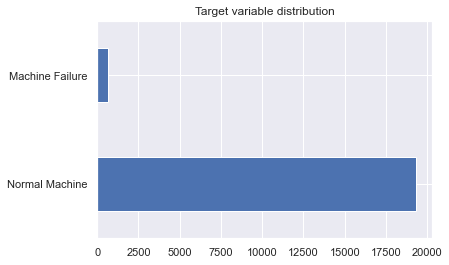

In [12]:
normal,failure = factory_EDA['Machine Status'].value_counts()
display(factory_EDA['Machine Status'].value_counts().rename(index={0:'Normal Machine has', 1:'Machine Failure has'}))

axs = factory_EDA["Machine Status"].value_counts().rename(index={0:'Normal Machine', 1:'Machine Failure'}).plot(kind='barh', title="Target variable distribution")
print(f'We can see that {failure/(failure + normal):.3f}% of the machines in this dataset are of "Failure" class')
# Imbalanced

ML Models tend to work better with equal number of samples in each class. However, **We can see that the no. of observations for each of the 2 categories in target variable 'Machine Status' is very far from equal.** There is a disproportionate ratio of observations for 'Machine Status'. This is a common problem, and we can address it through stratification and more nuanced performance metrics (f2_score) 
- Ultimately, we do not want a model to be **horrible** at classifying machine of 'failure' class
- We note that machine status are already encoded in its binary form and we do not have to perform preprocessing on the target variable.

### Categorical features

Quality describes the condition /state of the machine

> Given that `Quality` is a categorical ordinal feature we are going to use, and has 3 unique classes, We can then perform Ordinal encoding as the observations are ordinal `(ordinal variables)`<br><br>
> This is because we can clearly see that `Quality` has a clear ordering of categories <br>

> Encoding this categorical feature will not result in high cardinality, which is a good thing.

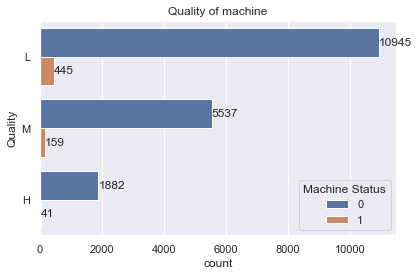

In [13]:
sortedQuality = factory_EDA['Quality'].value_counts().sort_values(ascending=False).index
ax2 = sns.countplot(data = factory_EDA,y = factory_EDA['Quality'], orient = 'h',order = sortedQuality, hue='Machine Status')
ax2.set_title('Quality of machine')

vals = factory_EDA['Quality'].value_counts(ascending=False).values
for c in ax2.containers:
    labels = [f'{(v.get_width())}' for v in c]
    ax2.bar_label(c, labels=labels, label_type='edge')
plt.tight_layout()
plt.show()

1. We can observe that most machines are of Low quality, while there is a lesser amount of High quality machines
2. Most of the faulty machines come from the Low quality class, in contrast to 41 faulty machines that are from High quality class
3. We observe that there are way more normal machines than faulty machines for all 3 classes

# Exploring general continuous/discrete features

### Feature Engineering

Before proceeding, we will create some new features that we will perform EDA on, and can provide more information towards the model.

1. Power Output: Power output of an engine, `(Torque multiplied by rotational speed of an axis)`
2. Temp diff: Temperature difference between machine temp and surrounding temperature
3. Revolutions (before fail): Describes number of revolutions the machine will have before fails 

Larger temperature difference could indicate overheating, and possibly indicate that machine is failing.

In [14]:
factory_EDA['Power Output'] = factory_EDA['Torque (Nm)'] * factory_EDA['Rotation Speed (rpm)']
factory_EDA['Temp diff'] = factory_EDA['Process T (C)'] - factory_EDA['Ambient T (C)']
factory_EDA['Revolutions before fail'] = factory_EDA['Rotation Speed (rpm)'] * factory_EDA['Tool Wear (min)']

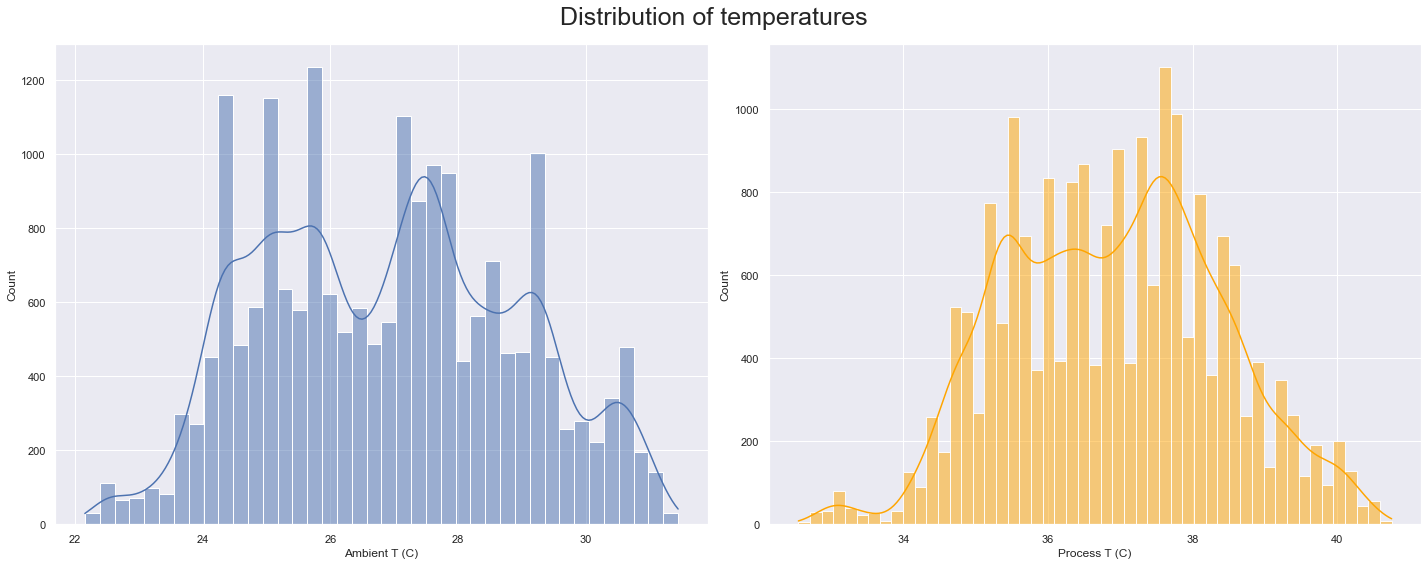

In [15]:
def plot_graph(df,feature1,feature2, trans):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    if trans == True:
        sns.histplot(data = df,x = np.log(df[feature1]),ax=ax1)
        sns.histplot(data = df,x = np.log(df[feature2]),ax=ax2)
        return fig
    sns.histplot(data = df,x = feature1,ax=ax1,kde=True)
    sns.histplot(data=df,x =feature2,ax=ax2,color='orange',kde=True)
    fig.suptitle('Distribution of temperatures', fontsize = 25)
    return fig
plot_graph(factory_EDA,'Ambient T (C)','Process T (C)',trans=False)
plt.tight_layout()
plt.show()
# Multimodal

- Ambient T (C) describes environment temperature the machine is in, while Process T (C) tells us the Machines temperature. Higher temperature suggests higher warmness.


* Shape of distribution is slightly wide in the middle for Process and Ambient T, suggests temperatures are closer to median.
- Both of them follow a multimodal distribution, with most machines being around 37.8 (C), and surrounded in an environment of 25.9 (C)
- Notice the existence several machines with above average temp, at above 40 (C) or below 34 (C) for machine temperature.
- Generally, the machines has a higher temperature than the environment, which is logical as they give off a lot of heat due to operations

# Boxplots and histograms:
* Tool Wear follows a consistent uniform distribution, machines generally have a tool wear time ranging from 20-200 uniformly.
* Torque follows a normal distribution, suggests that most machines have turning force of around 37-40 Newtonmeter
* Rotation speed shows a positively skewed distribution, with machines having rotation speed as extreme as 2750 (rpm)

* `Temp diff` follows a multimodal distribution, where for most machines, the temp difference is 9.5 (C) or 11 (C)
* `Power output` generally follows a normal distribution, and seems pretty normalised.
1. We can see that rotation speed may contain extreme outliers, while remaining numerical variables do not really contain outliers/contain very little.
2. Median rotation speed is around 1500, while max is around 2900, suggests that rotation speed values varies significantly
3. Most extreme outlier are from machines with around rotation speed of 2800 and machines with torque of 78 newton- meters.

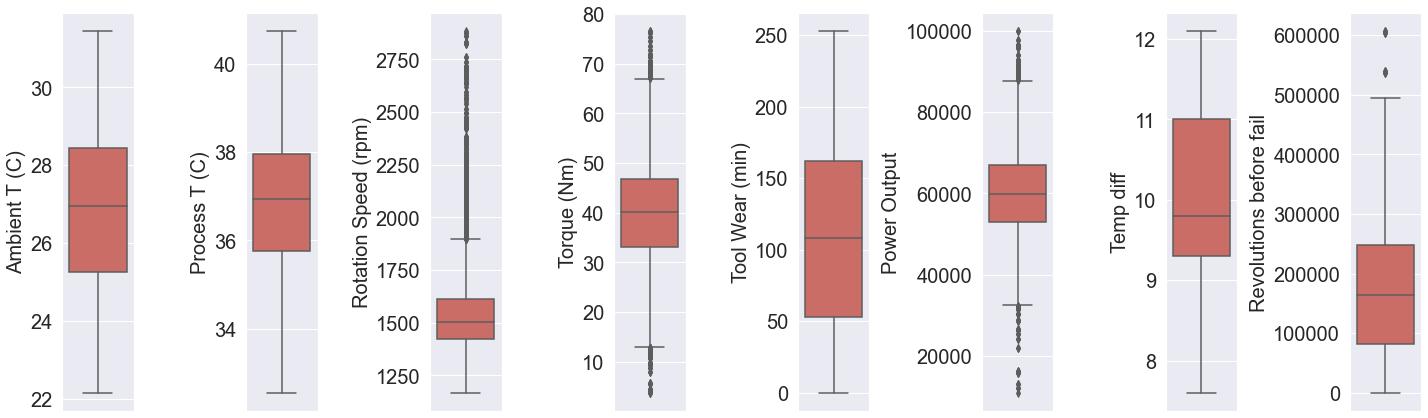

In [16]:
figout, axout = plt.subplots(1, 8, figsize=(20, 6), tight_layout = True)
for i, col in enumerate(['Ambient T (C)','Process T (C)', 'Rotation Speed (rpm)', 'Torque (Nm)', 'Tool Wear (min)', 'Power Output', 'Temp diff','Revolutions before fail']):
    axout[i].tick_params(axis='both', which='major', labelsize=20)
    sns.boxplot(data = factory_EDA, y=col, ax = axout[i],palette='hls')
    # figout.suptitle('Boxplot to examine')
    axout[i].set_ylabel(col,fontsize=20)
figout.show()

We note that there are more numerical features than categorical
- Median may be a better measure of central tendancy for rotation speeds of machines due to skewness. (median of 1500)

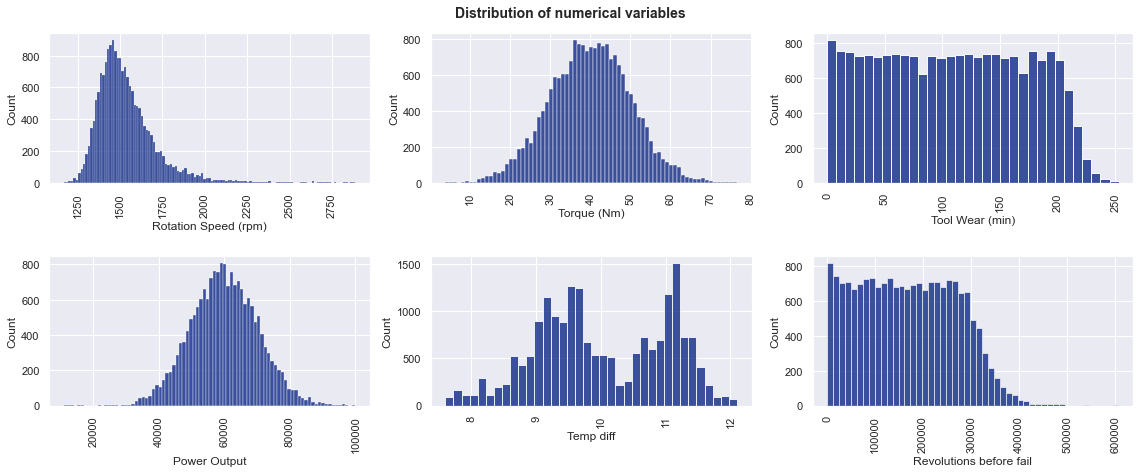

In [17]:
plt.figure(figsize=(16,9))
for o, b in enumerate([ 'Rotation Speed (rpm)', 'Torque (Nm)', 'Tool Wear (min)', 'Power Output', 'Temp diff','Revolutions before fail']):
    sns.set_palette(sns.color_palette("dark"))
    axx = plt.subplot(3,3,o+1)
    sns.histplot(x=b, data = factory_EDA, ax = axx)
    sns.set_style('darkgrid')
    plt.xticks(rotation=90)
    plt.suptitle("Distribution of numerical variables",fontweight = 'bold', fontsize = 14)
    plt.tight_layout()

We can clearly see that `Rotation Speed (rpm)` is most skewed. With existance of extreme outliers.

### Outlier examination

We can see that there are several extreme outliers, with some machines exceeding 2800 rpm. But however, we can see that these extreme outliers indicate faulty machines. We really need to consider whether we should handle by dropping or just leave the outliers, **given the fact that our target variable contain very little positive classes**. We will need to analyse further before making a judgement call.

In [18]:
px.histogram(x=factory_EDA['Rotation Speed (rpm)'],color=factory_EDA['Machine Status'])

Exploring Torque (Nm)

In [19]:
def outlierDetection(dataframe,col):
    df = dataframe.copy()
    q1= df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    upperFence = q3 + 1.5 * IQR
    lowerFence = q1 - 1.5 * IQR
    mask = (df[col] > upperFence) | (df[col] < lowerFence)
    return mask.values
outlier = outlierDetection(factory_EDA, "Torque (Nm)")

There are a ton of outliers that are of the positive class (Machines that fail), handling/dropping outliers will really cause a greater imbalance.

In [20]:
factory_EDA[outlier]['Machine Status'].value_counts()

1    124
0     14
Name: Machine Status, dtype: int64

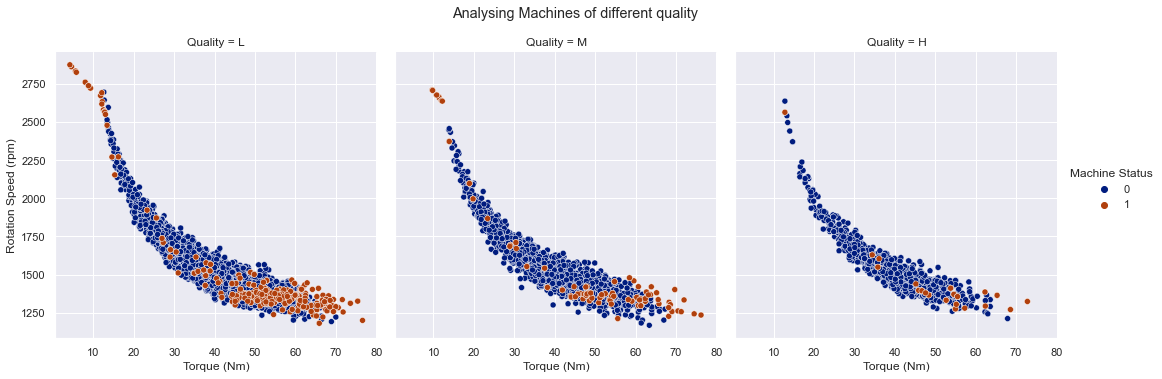

In [21]:
sns.relplot( x= 'Torque (Nm)' , y = 'Rotation Speed (rpm)' , data = factory_EDA.sort_values('Machine Status' )  , hue = 'Machine Status' , col = 'Quality' , col_order = ['L' , "M"  , 'H'])
plt.suptitle('Analysing Machines of different quality',y=1.05)
plt.show()

We can see that for machines of low quality generally consists of more machines that tend to fail as compared to other qualities. Machines with High quality are generally fine.
1. We can see an interesting shape of the plots similar of a cigar pipe/exponential shape
2. Outliers can be seen with rotation speed of 2600 (rpm) and above/Torque of 14 Nm and below for both Low and medium quality machines.
3. These outliers are interesting as they are all the machines that fail, and they have abnormally high rotation speeds, which is not really expected from a running machine that will fail.
4. However, these observations contribute to a small percentage of our dataset, and are very much valid as they are of `Quality`: L, lower quality machines are generally worn and run down, and may not have its original functioning power, and may likely fail despite having high rotation speeds.

6. Generally, most normal machines have rotation speed (rpm) of around 1250-1750 and torque (Nm) of around 30-50

##### As mentioned, given that we already have an imbalanced dataset containing very little faulty machines (positive class)
##### Removing outliers will also mean further **decreasing** the number of faulty machines, which means severely limiting the model to predict positive class. 
- Given this, we will not drop the outlier observations

In [22]:
# Diving deeper into outliers, we notice that most of them are low quality and have generally lower torque speed and are 
# Faulty machines
factory_EDA[factory_EDA['Rotation Speed (rpm)'] > 2600].head()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status,Power Output,Temp diff,Revolutions before fail
50,51,K10155,L,25.75,35.95,2861.0,4.6,143,1,13160.6,10.2,409123.0
194,195,K67018,M,25.05,35.35,2678.0,10.7,86,1,28654.6,10.3,230308.0
463,464,T85290,L,24.25,35.55,2874.0,4.2,118,1,12070.8,11.3,339132.0
847,848,K89096,L,23.25,34.25,2833.0,5.6,213,1,15864.8,11.0,603429.0
1095,1096,S10879,L,23.75,34.35,2721.0,9.3,18,1,25305.3,10.6,48978.0


## Phik (𝜙k) correlation

Phik (𝜙k) is a correlation coefficient that works consistently between numerical, ordinal variables. This is very useful for this current dataset.
- We will observe the correlation from the heatmap below
- It is useful for multi-type variables
- The correlation ranges from 0 to 1, with 0 having no association, while 1 denoting high association

Excluding unique ID as they do not provide information towards target variable and product ID as it has very large unique values.

interval columns not set, guessing: ['Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)', 'Torque (Nm)', 'Tool Wear (min)', 'Machine Status', 'Power Output', 'Temp diff', 'Revolutions before fail']


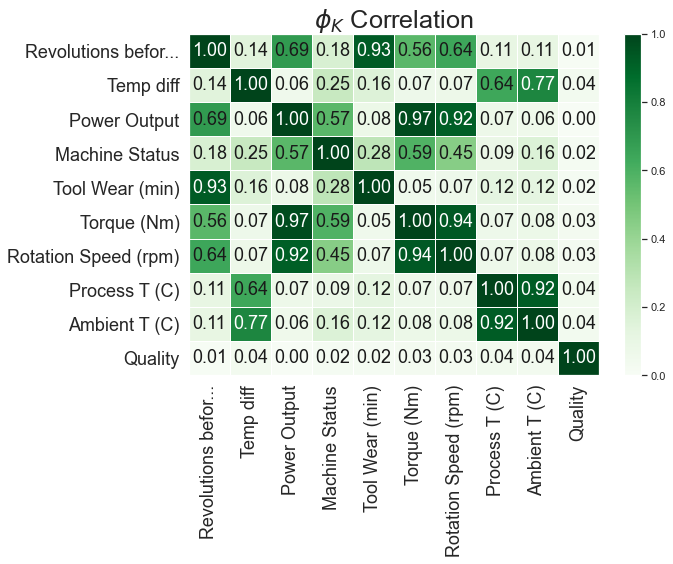

interval columns not set, guessing: ['Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)', 'Torque (Nm)', 'Tool Wear (min)', 'Machine Status', 'Power Output', 'Temp diff', 'Revolutions before fail']


,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status,Power Output,Temp diff,Revolutions before fail
Quality,1.000000,0.037211,0.040408,0.029488,0.027678,0.022268,0.020854,0.000000,0.037178,0.008174
Ambient T (C),0.037211,1.000000,0.924341,0.075272,0.075661,0.123530,0.161758,0.059559,0.772588,0.108449
Process T (C),0.040408,0.924341,1.000000,0.068973,0.067028,0.124623,0.088452,0.073539,0.637099,0.106703
Rotation Speed (rpm),0.029488,0.075272,0.068973,1.000000,0.937452,0.069768,0.445747,0.917659,0.070920,0.643157
Torque (Nm),0.027678,0.075661,0.067028,0.937452,1.000000,0.054709,0.585985,0.974676,0.068029,0.564209
Tool Wear (min),0.022268,0.123530,0.124623,0.069768,0.054709,1.000000,0.279671,0.080700,0.157506,0.929139
Machine Status,0.020854,0.161758,0.088452,0.445747,0.585985,0.279671,1.000000,0.566189,0.247510,0.182672
Power Output,0.000000,0.059559,0.073539,0.917659,0.974676,0.080700,0.566189,1.000000,0.057137,0.689184
Temp diff,0.037178,0.772588,0.637099,0.070920,0.068029,0.157506,0.247510,0.057137,1.000000,0.142073
Revolutions before fail,0.008174,0.108449,0.106703,0.643157,0.564209,0.929139,0.182672,0.689184,0.142073,1.000000


In [23]:
summary = factory_EDA.drop(['Unique ID', 'Product ID'],axis=1).phik_matrix()
plot_correlation_matrix(summary.values, 
                        x_labels=summary.columns, 
                        y_labels=summary.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"$\phi_K$ Correlation", 
                        fontsize_factor=1.8, 
                        figsize=(10, 8))
plt.show()
display(factory_EDA.drop(['Unique ID', 'Product ID'],axis=1).phik_matrix())

In [24]:
summary.sort_values(ascending=False, by='Machine Status')['Machine Status']

Machine Status             1.000000
Torque (Nm)                0.585985
Power Output               0.566189
Rotation Speed (rpm)       0.445747
Tool Wear (min)            0.279671
Temp diff                  0.247510
Revolutions before fail    0.182672
Ambient T (C)              0.161758
Process T (C)              0.088452
Quality                    0.020854
Name: Machine Status, dtype: float64

- Some of the features are highly correlated to one another.
- Creates an issue of multicollinearity where several features in a model are correlated.
- Multicollinearity may affect the interpretability of the model. (Feature importances)
- For e.g, Features like Torque and Rotation speed have the highest correlations with each other(0.94), suggesting that there may be redundant information.
- Feature selection can benefit us, depending on no. of features. Type of model can benefit too.
- For temperatures, Process T and Ambient T have a correlation of 0.92.
- Very little association between Quality and Machine status
- Features that have quite high correlation with target variable are ['Power Output' (0.57), 'Torque']. This is logical as Power output measures rate of doing work, which can possibly determine whether a machine is either failing or functioning fine, these features could be important to the model
- We note that Machine status (target class) and Torque are quite correlated, with a Phik correlation of 0.59
- This would make sense as torque describes twisting force/circulatory force of a machine.

# Preprocessing

- Dropping IDs as it does not seem to provide useful information towards our target variable
- Further preprocessing will be done in the pipeline later on

In [25]:
# We will drop IDs as it does not appear to be useful as explained above
factory_df2= factory_df.copy()
factory_df.drop(['Unique ID','Product ID'], inplace=True,axis=1)

<h2>Missing values</h2>

> We can see that there are missing values from `Quality`, `Process T` and `Rotation Speed (rpm)` features

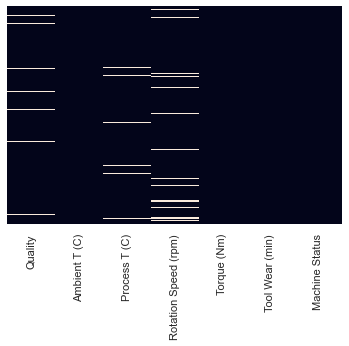

In [26]:
sns.heatmap(factory_df.isnull(),yticklabels=False,cbar=False)
plt.show()
# Light colors denote missing values
# We can see that for some rows, there are perhaps more than one missing value

In [27]:
factory_df.isnull().sum()
# Check how many missing values per column

Quality                  991
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

> - Recognize the need to retain precious data for the model, further dropping may cause a greater imbalance dataset <br>
> - The easiest solution is to use `dropna()`
> - We can try to impute missing values through imputers such as `SimpleImputer()` or more advanced imputers such as `IterativeImputer()` / `KNNImputer()`
> - We will impute the values later through the preprocessing pipeline
- We should note that our imputation process should NOT distort the initial distribution of imputed variables

In [28]:
len(factory_df) -len(factory_df.dropna())
# We can see that dropping na values will contribute to the loss of more than 10% of our dataset which we will not do.

2471

### Separating Features from target variable, as well as splitting into Training and Testing sets.
>1. `Stratify = y` parameter is used due to imbalanced dataset
- So that the training and test sets contain examples of each class in the same proportions as in the original dataset
>2. Split dataset into training and testing sets via `train_test_split`
>3. Use of train test split such that the training set has **no** idea about the test set
>4. Test set is used as an unseen set, to have a last and crucial evaluation of the utility of final model
>5. **It is only when the model comes across data it has not seen before, then we can really determine how good the model generalizes.**

In [29]:
X, y = factory_df.drop(['Machine Status'], axis = 1), factory_df["Machine Status"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state =rstate)

Please ignore cell below (X2,y2) (used for feature engineering later)

In [31]:
X2, y2 = factory_df2.drop(['Machine Status','Unique ID'], axis = 1), factory_df2["Machine Status"]
X_train_prod,X_test_prod, y_train_prod,y_test_prod = train_test_split(X2, y2, test_size=0.2, stratify=y2,random_state =rstate)

- As a general rule to prevent data leakage, `.fit()` will not be called on test set.
- `train_test_split` is called before preprocessing

# Model evaluation metrics

> #### To perform model evaluation, **$F_2$ score**, precision, recall scores will be included and used to evaluate the model

- The higher each of the scores, the better the model performs.
- **Since our data is imbalanced, and that predicting machine failure is far way more important than predicting it wrongly, Recall score is hence crucial. (little positive samples)**

$F_2$ score


$$
F_2 = 5 * \frac{precision*recall}{4 * precision + recall} = \frac{TP}{TP + 0.2FP + 0.8FN}
$$

- ***F2 score*** is calculated from the precision and recall scores of a classification model, weighing recall score more important than precision score.
- Since recall score is more relevant in this classification task as mentioned earlier, F2 score is a better metric to decide the usefulness of the model.
- TLDR: More useful indicator to measure the value of a model
>  **We consider it much worse to miss a possible faulty machine than to give a false alarm of a normal machine due to the negative productivity loss as well as the exorbitant revenue lost from machine failure**
- It is worth noting the **importance** to classify more positive samples <br> 


The metric ranges from 0 to 1, with 1 being the best, indicating a model of good quality
* Ultimately, we want the model to predict both positive/negative classes accurately

In [32]:
f2_score = make_scorer(fbeta_score, beta = 2)
# F2 SCORE

<h2>Further preprocessing in a pipeline to prevent data leakage</h2>
<li> Before training the model, we need to prepare the data

> #### Use of ColumnTransformer and FunctionTransformer to aid preprocessing 
- CT - Apply transformation to columns, FT - stateless transformations
>##### Using KBinsDiscretizer to perform binning on `Tool Wear (min)`, (similar to `pd.qcut`)
- Tool wear feature follows a uniform distribution, moreover, Binning can help make the model more robust and prevent overfitting. The data also becomes more regularized
>##### OrdinalEncoder to encode `Quality` column.
-  Since `Quality` column is ordinal in nature, of `Low`, `Medium` and `High`, we will use Ordinal Encoder to encode to `0` `1` `2` respectively
>##### AdditionalFeature class to create new features `Power`, `Temp Diff` and `Revolutions`
- Added several features that can help model
- `Power` is derived from `Rotation speed` * `Torque` 
- `Temp diff` is derived from `Process T` - `Ambient T`, 
- `Revolutions` is derived from `Tool Wear` * `Rotation Speed`
- **With regards to the creation of new features, we will review this idea later.**
>##### Use of `IterativeImputer()` to impute missing values. 
- Class for imputation of missing values using other columns
- Use of a regression model to predict missing continuous variables and a classification model to predict missing categorical variables
- KNeighborsRegressor learns from samples with missing values by using a distance metric that accounts for missing values. Decision tree clf and KNN reg are used, which are not very computationally expensive
- Multivariate approach to impute, note that machine status is not used to impute as it may lead to data leakage

In [33]:
# Used to create new features and add it into the pipeline.
class AdditionalFeature(BaseEstimator,TransformerMixin):
    def __init__(self,col1,col2,prod,operator):
        self.col1 = col1
        self.col2 = col2
        self.prod = prod
        self.operator = operator
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # Create new features
        X_ = X.copy()
        if self.operator:
            X_[self.prod] = X_[self.col1] - X_[self.col2]
            return X_
        else:
            X_[self.prod] = X_[self.col1] * X_[self.col2]
            return X_

        
# ===========================================================================================
# Ordinal encoding
order = Pipeline([
    ('order',OrdinalEncoder(categories=[['L', 'M', 'H']], handle_unknown = 'use_encoded_value'  ,unknown_value = np.nan ) )
])


encoder = ColumnTransformer([ ("Ordinal_quality", order, ['Quality'])])
# Function to encode ordinal variables using ordinal encoder
def encodeOrdinal(X , y = None):
    xcopy = X.copy()
    xcopy['Quality'] = encoder.fit_transform(X).ravel()
    return xcopy 
# ===========================================================================================


# ===========================================================================================
# FOR IMPUTATION
# Class to impute missing values
class Imputation(BaseEstimator,TransformerMixin):
    def __init__(self, reg,clf):
        self.reg = reg
        self.clf = clf
    def fit(self,X,y=None):
        return self
    def transform(self,X , y = None):
        x_copy = X.copy()
        x_copy['Quality'] =  x_copy['Quality'].astype('i' ,  errors='ignore')
        original_quality = x_copy['Quality'].copy()
        temp = IterativeImputer(estimator = self.reg, random_state=rstate).fit_transform(x_copy)
        x_copy[:] = temp
        # display(pd.DataFrame(temp))
        x_copy["Quality"] = original_quality
        noNull = x_copy[~x_copy['Quality'].isnull()].copy()
        noNull['Quality'] = noNull['Quality'].astype('i')
        withnull  = x_copy[x_copy['Quality'].isnull()]
        model = self.clf.fit(noNull.drop(columns = ['Quality'])  ,noNull.Quality)
        pred = model.predict(withnull.drop(columns = ['Quality']))
        x_copy.loc[x_copy['Quality'].isnull(), 'Quality']  = pred
        return x_copy

# ===========================================================================================

# For binning/ encoding preprocessing steps
kbin = Pipeline([
    ('Binning', KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile'))
])

cTrans = ColumnTransformer([
    ("Binning_implementation", kbin, ['Tool Wear (min)'])
], remainder="passthrough")
# ===========================================================================================
# Preprocessing pipeline

preprocess = Pipeline([
    ('Encode', FunctionTransformer(encodeOrdinal)),
    ('Imputation', Imputation(KNeighborsRegressor(), DecisionTreeClassifier(random_state=rstate))),
    ('Power', AdditionalFeature('Torque (Nm)','Rotation Speed (rpm)','Power', None)),
    ('Temp diff', AdditionalFeature('Process T (C)', 'Ambient T (C)', 'Temp diff', 'Minus')),
    ('Revolution', AdditionalFeature('Tool Wear (min)','Rotation Speed (rpm)','Revolution',None)),
    ('Preprocessing', cTrans)    
])

<h5>Example: Distribution of train set before and after imputation</h5>

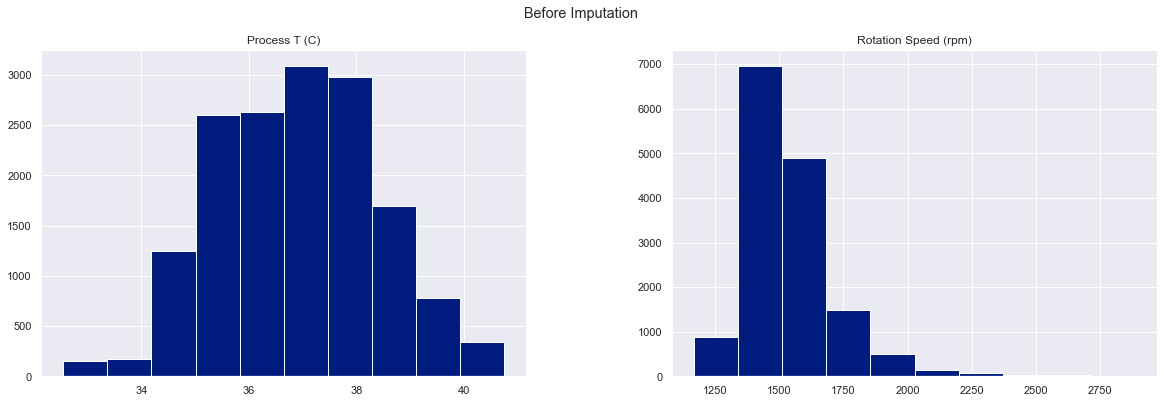

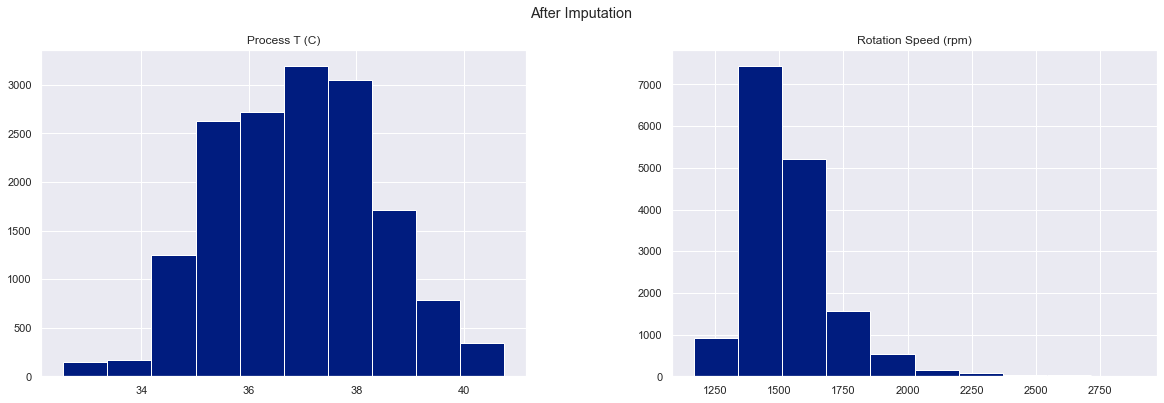

In [34]:
prepX_train = X_train.copy()
figbef, axbef1 = plt.subplots(1,2, figsize=(20,6))
prepX_train.hist(column=["Process T (C)", 'Rotation Speed (rpm)'],ax=axbef1)
figbef.suptitle('Before Imputation')

afterPrep = pd.DataFrame(preprocess.fit_transform(prepX_train), columns= ['Tool Wear (min)','Quality', 'Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)', 'Torque (Nm)', 'Power', 'Temp Diff (C)', 'Revolutions'])
figafter, axafter1 = plt.subplots(1,2, figsize=(20,6))
afterPrep.hist(column=["Process T (C)", 'Rotation Speed (rpm)'],ax=axafter1)
figafter.suptitle('After Imputation')
plt.show()


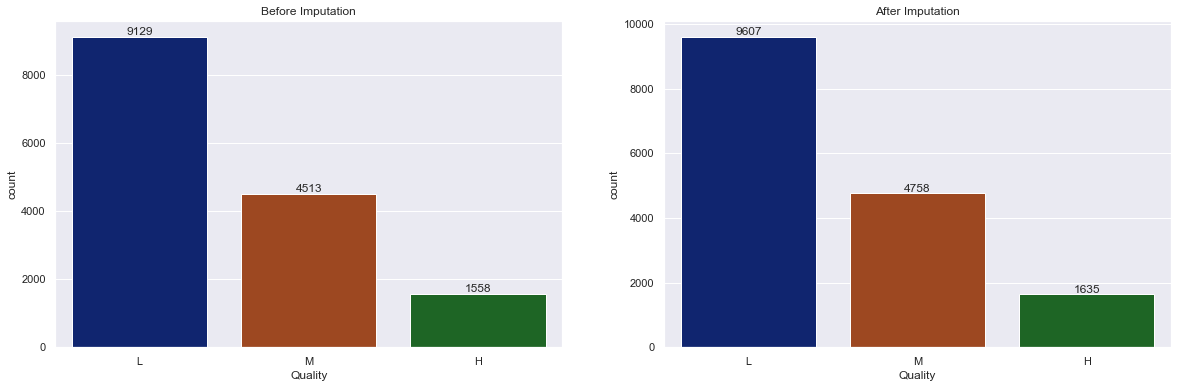

In [35]:
figqua, (axqua1,axqua2) = plt.subplots(1,2, figsize=(20,6))
sns.countplot(data=prepX_train,x='Quality',ax=axqua1,order=['L', 'M', 'H']).bar_label(container=axqua1.containers[0],labels=prepX_train['Quality'].value_counts() )
qualityeda = afterPrep.copy()
qualityeda['Quality'] =qualityeda['Quality'].map({0: 'L', 1:'M', 2:'H'})
sns.countplot(data=qualityeda,x='Quality',ax=axqua2,order=['L', 'M', 'H']).bar_label(container=axqua2.containers[0],labels=qualityeda['Quality'].value_counts() )
axqua1.set_title('Before Imputation')
axqua2.set_title('After Imputation')
plt.show()

The distribution of variables before and after imputation roughly remained similar, which is a good sign.
- Imputation did not distort the initial distribution

# Modelling

Ultimately, we want to pick a useful model that helps us understand how the features relate to the target variable, at the same time possessing a high F2 score

Functions below are used to evaluate the model.
F1 score included in Stratified K Fold CV 

- **How Stratified K Fold CV works:**
1. Stratification will enable the training and test data to contain examples of each class in the same proportions as in the original dataset. We do not have to worry about any splits containing very few or none of the minority class given that our dataset is very imbalanced.

2. By setting k∈ ${\mathbb {Z^+}}$, in this case for example: k=5, we will partition the training set into 5 different folds, 4 of them will be used for model training (fit), while last fold (test set) is used for evaluation/prediction, and computation of metrics. This process is repeated for 5 times, with a set `previously` from the train set, swapped as the test set in each split. Eventually, all 5 folds will be in the place of a test set once.
- Scores are recorded for each split.


In [36]:
# Plot a learning curve for model

def plot_curve(pipe,X_train,y_train,name, scoring = f2_score,cv = 5):
    train_sizes, train_scores, test_scores= learning_curve(
            pipe,
            X_train,
            y_train,
            cv=StratifiedKFold(n_splits=cv,shuffle=True),
            n_jobs=-1,
            train_sizes = np.linspace(0.01, 1, 20),
        scoring= f2_score
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print()
    plt.rc('font', size=14)
    plt.rc('axes', labelsize=14, titlesize=14)
    plt.rc('legend', fontsize=14)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.figure(figsize = (16,8))
    plt.ylabel(f"F2 Score")
    plt.xlabel("Train Sizes")
    plt.title(name)
    plt.plot(train_sizes ,train_scores_mean , c =  'blue' , label = 'Train scores'  )

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1,
                        color="r")
                        
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes ,test_scores_mean , c =  'orange' , label = 'Test scores')

    plt.legend()
    
    plt.show()

# Function to show cross validation scores for the model purpose is to evaluate model performance
# Cross validate and displays the scores for different metrics on the TRAIN set
def cross_val_scores(pipe,X_train,y_train,name):
    f2_score = make_scorer(fbeta_score, beta = 2)
    scoring = {
        'f1': 'f1',
        'f2': f2_score,
        'recall':'recall',
        'precision':'precision',
        'accuracy':'accuracy'
    }
    scores = cross_validate(pipe, X_train, y_train, cv = StratifiedKFold(n_splits = 5, shuffle = True,random_state=rstate), scoring = 
    scoring, return_train_score = True, return_estimator = True, n_jobs= -1)
    scores = pd.DataFrame(scores).append(pd.DataFrame(scores).describe().loc[['mean','max']]).drop(['fit_time', 'score_time'],axis=1).round(4)
    scores['estimator']= name
    return pd.DataFrame(scores), scoring

- We will first implement a learning curve to plot cross-validated training and testing F2 Scores against different training set sizes so that we have a sense how well the model is performing as well as scrutinize if a model is suffering from high bias/variance.
- And then evaluate our model using **Stratified K Fold Crosss validation** on the training data to have a better representation of how well the model is performing. 

- The final model is then `improved` further, followed by a final evaluation using a unseen test set

## Stupid Baseline model <br>
- Used to compare with other models
- strategy='uniform' generates predictions uniformly
- Standardizing features via standardscaler

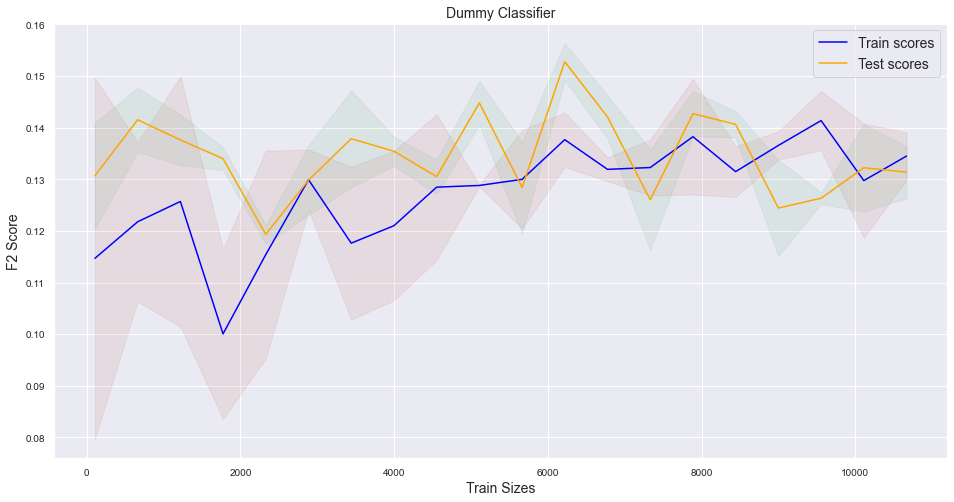

,estimator,test_f1,train_f1,test_f2,train_f2,test_recall,train_recall,test_precision,train_precision,test_accuracy,train_accuracy
0,Dummy,0.0625,0.0593,0.1312,0.1246,0.4907,0.4700,0.0334,0.0316,0.5031,0.4941
1,Dummy,0.0580,0.0596,0.1221,0.1253,0.4630,0.4724,0.0309,0.0318,0.4925,0.4947
2,Dummy,0.0721,0.0691,0.1517,0.1451,0.5741,0.5415,0.0385,0.0369,0.5012,0.5057
3,Dummy,0.0724,0.0681,0.1524,0.1431,0.5780,0.5404,0.0386,0.0363,0.4956,0.4993
4,Dummy,0.0613,0.0668,0.1290,0.1406,0.4862,0.5335,0.0327,0.0356,0.4931,0.4958
mean,Dummy,0.0653,0.0646,0.1373,0.1357,0.5184,0.5116,0.0348,0.0345,0.4971,0.4979
max,Dummy,0.0724,0.0691,0.1524,0.1451,0.5780,0.5415,0.0386,0.0369,0.5031,0.5057


In [37]:
baseline = Pipeline([
    ('prep', preprocess),
    ('Scaler', StandardScaler()),
    ('Model', DummyClassifier(strategy='uniform'))
])

plot_curve(baseline,X_train,y_train,'Dummy Classifier',cv=3)
dummyModel, _ = cross_val_scores(baseline,X_train,y_train, 'Dummy')
display(dummyModel)


This stupid baseline model does not perform very well, but very poorly, with low f1 and f2 scores, having a high bias and is likely underfitting.

**We will be selecting our models that are used for commonly used for classification (ensemble, logreg,trees)**

## K Nearest neighbors

We will scale the data using `StandardScaler()` after preproccessing 

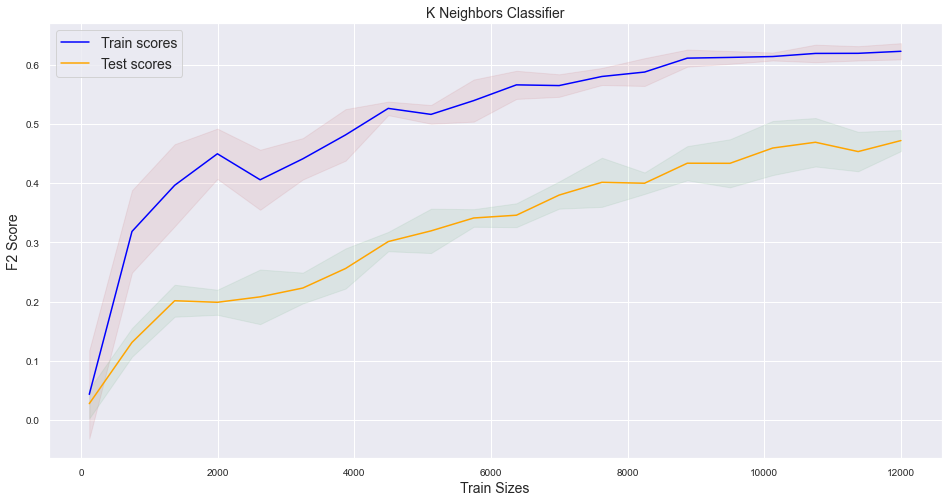

,estimator,test_f1,train_f1,test_f2,train_f2,test_recall,train_recall,test_precision,train_precision,test_accuracy,train_accuracy
0,KNC,0.5988,0.7288,0.5092,0.6482,0.4630,0.6037,0.8475,0.9193,0.9791,0.9848
1,KNC,0.5989,0.7218,0.5289,0.6460,0.4907,0.6037,0.7681,0.8973,0.9778,0.9842
2,KNC,0.6163,0.7025,0.5343,0.6175,0.4907,0.5714,0.8281,0.9118,0.9794,0.9836
3,KNC,0.5647,0.7446,0.4829,0.6732,0.4404,0.6328,0.7869,0.9043,0.9769,0.9853
4,KNC,0.5466,0.6925,0.4508,0.6040,0.4037,0.5566,0.8462,0.9163,0.9772,0.9833
mean,KNC,0.5850,0.7180,0.5012,0.6378,0.4577,0.5936,0.8153,0.9098,0.9781,0.9842
max,KNC,0.6163,0.7446,0.5343,0.6732,0.4907,0.6328,0.8475,0.9193,0.9794,0.9853


In [38]:
knc = Pipeline([
    ('Preprocess', preprocess),
    ('Scale', StandardScaler()),
    ('Model', KNeighborsClassifier(n_neighbors=5))
])
plot_curve(knc,X_train,y_train,'K Neighbors Classifier',cv=4)
kneigh,scr = cross_val_scores(knc,X_train,y_train, 'KNC')
display(kneigh)

K Neighbors classifier does not perform very well and it seems that it has pretty high bias, with unimpressive scores, seems like underfitting. It also has pretty bad recall and $F_2$ scores.

## Random Forest Classifier

1. Scaling not needed as of now, evaluation is done later.

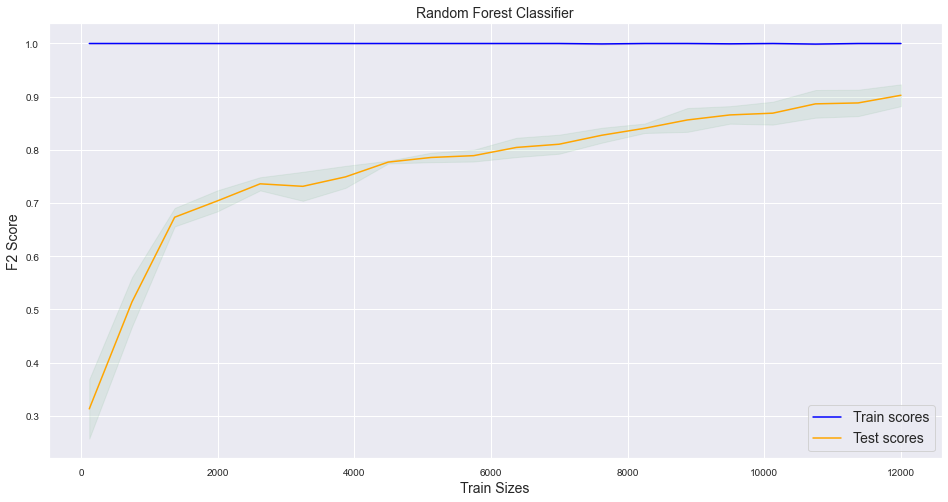

,estimator,test_f1,train_f1,test_f2,train_f2,test_recall,train_recall,test_precision,train_precision,test_accuracy,train_accuracy
0,RandomForest,0.9223,1.0,0.8962,1.0,0.8796,1.0,0.9694,1.0,0.9950,1.0
1,RandomForest,0.8878,1.0,0.8601,1.0,0.8426,1.0,0.9381,1.0,0.9928,1.0
2,RandomForest,0.9238,1.0,0.9082,1.0,0.8981,1.0,0.9510,1.0,0.9950,1.0
3,RandomForest,0.9082,1.0,0.8801,1.0,0.8624,1.0,0.9592,1.0,0.9941,1.0
4,RandomForest,0.8725,1.0,0.8380,1.0,0.8165,1.0,0.9368,1.0,0.9919,1.0
mean,RandomForest,0.9029,1.0,0.8766,1.0,0.8599,1.0,0.9509,1.0,0.9938,1.0
max,RandomForest,0.9238,1.0,0.9082,1.0,0.8981,1.0,0.9694,1.0,0.9950,1.0


In [39]:
rforest = Pipeline([
    ('preprocess', preprocess),
    ('Model', RandomForestClassifier(random_state=rstate,bootstrap=False))
])
plot_curve(rforest,X_train,y_train,'Random Forest Classifier',cv=4)
rfor,scoreRF =cross_val_scores(rforest,X_train,y_train, 'RandomForest')
display(rfor)

Random Forest classifier works very well with consistent perfect F2 Scores for Train sets, However, test scores indicate that the model might be slightly overfitting. This however, can be addressed via hyperparameter tuning. All in all, RF is generally an optimal model.

## Decision Tree Classifier

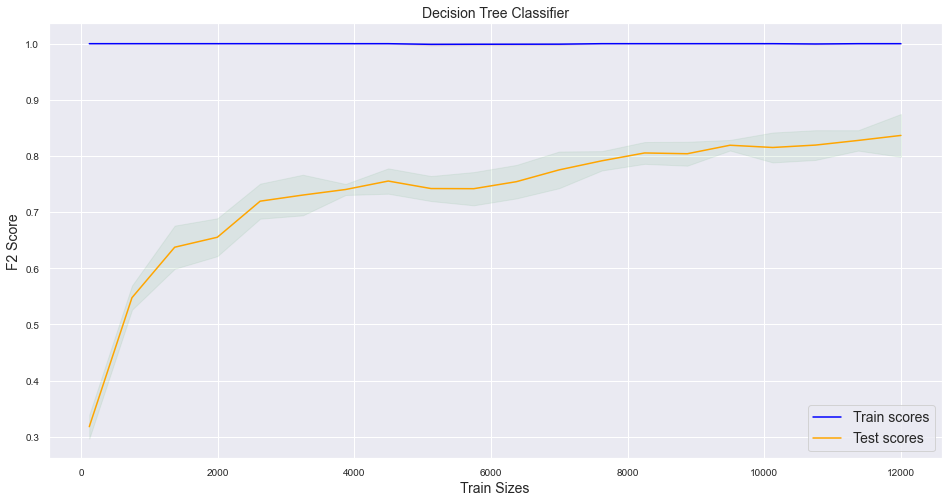

,estimator,test_f1,train_f1,test_f2,train_f2,test_recall,train_recall,test_precision,train_precision,test_accuracy,train_accuracy
0,Decision TreeCLF,0.8700,1.0000,0.8867,1.0000,0.8981,1.0,0.8435,1.0000,0.9909,1.0000
1,Decision TreeCLF,0.8357,1.0000,0.8287,1.0000,0.8241,1.0,0.8476,1.0000,0.9891,1.0000
2,Decision TreeCLF,0.8679,0.9988,0.8582,0.9995,0.8519,1.0,0.8846,0.9977,0.9912,0.9999
3,Decision TreeCLF,0.8341,1.0000,0.8455,1.0000,0.8532,1.0,0.8158,1.0000,0.9884,1.0000
4,Decision TreeCLF,0.8319,1.0000,0.8499,1.0000,0.8624,1.0,0.8034,1.0000,0.9881,1.0000
mean,Decision TreeCLF,0.8479,0.9998,0.8538,0.9999,0.8579,1.0,0.8390,0.9995,0.9896,1.0000
max,Decision TreeCLF,0.8700,1.0000,0.8867,1.0000,0.8981,1.0,0.8846,1.0000,0.9912,1.0000


In [40]:
dectree = Pipeline([
    ('Preprocess', preprocess),
    ('Model', DecisionTreeClassifier(random_state=rstate))
])
plot_curve(dectree,X_train,y_train,'Decision Tree Classifier',cv=4)
dectreeScore,scormethod =cross_val_scores(dectree,X_train,y_train, 'Decision TreeCLF')
display(dectreeScore)

Decision Tree Classifier performs quite well, however not as good as Random Forest.
- It has almost perfect train f2 scores
- Slightly lacking in terms of scores.
- Overfitting, and possess high variance.
- Inferior compared to RF

## Gradient Boosting classifier

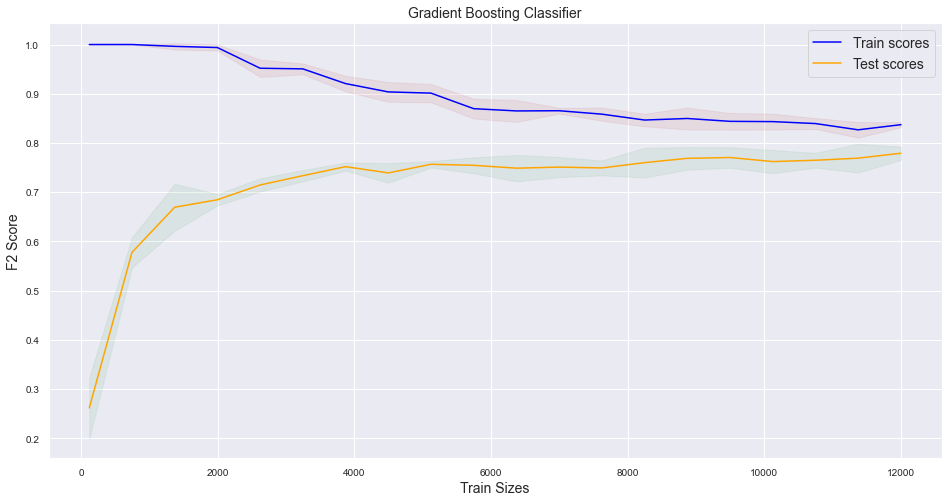

,estimator,test_f1,train_f1,test_f2,train_f2,test_recall,train_recall,test_precision,train_precision,test_accuracy,train_accuracy
0,GBC,0.7957,0.8739,0.7255,0.8218,0.6852,0.7903,0.9487,0.9772,0.9881,0.9923
1,GBC,0.8543,0.8710,0.8126,0.8177,0.7870,0.7857,0.9341,0.9771,0.9909,0.9921
2,GBC,0.8290,0.8763,0.7737,0.8286,0.7407,0.7995,0.9412,0.9693,0.9897,0.9923
3,GBC,0.8168,0.8665,0.7529,0.8218,0.7156,0.7945,0.9512,0.9529,0.9891,0.9917
4,GBC,0.8168,0.8732,0.7529,0.8197,0.7156,0.7875,0.9512,0.9799,0.9891,0.9923
mean,GBC,0.8225,0.8722,0.7635,0.8219,0.7288,0.7915,0.9453,0.9713,0.9894,0.9921
max,GBC,0.8543,0.8763,0.8126,0.8286,0.7870,0.7995,0.9512,0.9799,0.9909,0.9923


In [41]:
gratree = Pipeline([
    ('Preprocess', preprocess),
    ('Model', GradientBoostingClassifier(random_state=rstate))
])
plot_curve(gratree,X_train,y_train,'Gradient Boosting Classifier',cv=4)
gratreescore,gratreescormethod =cross_val_scores(gratree,X_train,y_train, 'GBC')
display(gratreescore)

A Gradient boosting classifier model performs quite well, as seen by the close gap seen from the training and validation folds. The model has low variance, but however, it does not perform as well as Random Forest, with a decent F2 score.

## Model Evaluation

In [42]:
display(pd.concat([gratreescore.T['mean'],dectreeScore.T['mean'],rfor.T['mean'],kneigh.T['mean']],axis=1))

,mean,mean,mean,mean
estimator,GBC,Decision TreeCLF,RandomForest,KNC
test_f1,0.8225,0.8479,0.9029,0.585
train_f1,0.8722,0.9998,1.0,0.718
test_f2,0.7635,0.8538,0.8766,0.5012
train_f2,0.8219,0.9999,1.0,0.6378
test_recall,0.7288,0.8579,0.8599,0.4577
train_recall,0.7915,1.0,1.0,0.5936
test_precision,0.9453,0.839,0.9509,0.8153
train_precision,0.9713,0.9995,1.0,0.9098
test_accuracy,0.9894,0.9896,0.9938,0.9781


1. Gradient boosting clf performs well with moderate bias and low variance, but it has an unimpressive metric f2 score.
3. Gradient boosting classifier performs quite consistently, however it generally does not posses a comparable $F_2$ score as compared to other ensembles.
2. (Distanced based models) - KNeighborsClassifier has a bad $F_2$ score as compared to the ensembles, and is underfitting. 
3. Decision tree performs quite decently. However, decision tree still lacks in terms of $F_2$ score, and overfits more than other ensembles. 

4. In this case random forest seems like a very good model.
5. Moreover, random forest posses a very high recall score and generally the highest $F_2$ scores, which is important in our scenario.
5. Random Forests are also pretty good for skewed features.
5. Given this, it is pretty evident that random forest is the best choice. 
-   Along with its feature importances available, we can really understand how features relate to target variable.
-   Possess highest $F_2$ scores through cross validation
<!-- 4. However, random forest is pretty robust against multicollinearity given that it will automatically "drop" one column at each split.  -->

## Model Improvement

## Feature selection

<!-- - Given our model (random forest), it may not as severely affected by multicollinearity as compared to other models. -->
- Given that multi-collinearity does not really affect the model's prediction capability, it may hinder the interpretability of the model, making properties like feature importances unreliable.
- However, we also need to note the very small number of features, hence we cannot reduce the number of features by too much. Reducing further will lead to underfitting
- We will attempt to perform feature selection.

We will view the effect of feature selection, if it performs well, then we will keep, if not then we will not use feature selection

In [43]:
def multicoll(df, top_n=None):
    corr_matrix_abs = df.corr(method='spearman').abs()
    corr_matrix_abs_us = corr_matrix_abs.unstack()
    sorted_features = corr_matrix_abs_us.sort_values(kind="quicksort", ascending=False).reset_index()
    sorted_features = sorted_features[
            (sorted_features.level_0 != sorted_features.level_1)
        ]
    sorted_features = sorted_features.iloc[:-2:2]

    sorted_features.columns = ['Feature One', 'Feature Two', 'Correlation'] 
    if top_n:
        return sorted_features[1:top_n]
        # Discretized tool wear (min)

    return sorted_features
multi = factory_EDA.copy()
multicoll(multi,top_n=5)

,Feature One,Feature Two,Correlation
12,Torque (Nm),Power Output,0.977869
14,Torque (Nm),Rotation Speed (rpm),0.916296
16,Process T (C),Ambient T (C),0.864262
18,Power Output,Rotation Speed (rpm),0.817125


1. Torque seems to be highly correlated to other features, we will see if dropping it can help.
3. However, this caused the model to perform worse, hence we will not drop it.

In [44]:
class ColumnDrop():
    def __init__(self,col):
        self.col=col
    def transform(self,X,y=None):
        return X.drop(self.col,axis=1)
    def fit(self,X,y=None):
        return self
        
pipeTorque = Pipeline([
    ('preprocess', preprocess),
    ("To DataFrame", FunctionTransformer(func=pd.DataFrame, kw_args={
    "columns" : ['Tool Wear (min)','Quality', 'Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)', 'Torque (Nm)', 'Power', 'Temp Diff (C)', 'Revolutions']
})),
    ('DropCol', ColumnDrop('Torque (Nm)')),
    ('Model', RandomForestClassifier(random_state=rstate))
])
wRevo, _ =cross_val_scores(pipeTorque, X_train, y_train,name='RF/without Torque' )
display(wRevo)
# ['Tool Wear (min)','Quality', 'Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)', 'Torque (Nm)', 'Power', 'Temp Diff (C)', 'Revolutions']

,estimator,test_f1,train_f1,test_f2,train_f2,test_recall,train_recall,test_precision,train_precision,test_accuracy,train_accuracy
0,RF/without Torque,0.8866,1.0,0.8301,1.0,0.7963,1.0,1.0000,1.0,0.9931,1.0
1,RF/without Torque,0.8586,1.0,0.8142,1.0,0.7870,1.0,0.9444,1.0,0.9912,1.0
2,RF/without Torque,0.8718,1.0,0.8189,1.0,0.7870,1.0,0.9770,1.0,0.9922,1.0
3,RF/without Torque,0.8351,1.0,0.7774,1.0,0.7431,1.0,0.9529,1.0,0.9900,1.0
4,RF/without Torque,0.8705,1.0,0.8077,1.0,0.7706,1.0,1.0000,1.0,0.9922,1.0
mean,RF/without Torque,0.8645,1.0,0.8096,1.0,0.7768,1.0,0.9749,1.0,0.9918,1.0
max,RF/without Torque,0.8866,1.0,0.8301,1.0,0.7963,1.0,1.0000,1.0,0.9931,1.0


Instead, We will next try to perform feature selection, with the aim to remove less powerful/redundant predictors from the data, to avoid our models overfitting to noise from less important features. (May also enhance model performance)
- We will attempt this by using a filter based feature selection
- Use of `SelectKBest` and `f_classif`
- We can see that the score slightly increased, with a value of `k=8`

In [45]:
df_cols =np.array(['Tool Wear (min)','Quality', 'Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)', 'Torque (Nm)', 'Power', 'Temp Diff (C)', 'Revolutions'])
rf_feature_select1 = Pipeline([
    ('preprocess', preprocess),
    ('FS', SelectKBest(f_classif,k=8) ),
])
rf_feature_select_final = Pipeline([
    ('FS+Prep', rf_feature_select1),
    ('Model', RandomForestClassifier(bootstrap=False,random_state=rstate))
])
fs_rf,_ = cross_val_scores(rf_feature_select_final,X_train,y_train, name='RF/SelectKBest')
display(fs_rf)

,estimator,test_f1,train_f1,test_f2,train_f2,test_recall,train_recall,test_precision,train_precision,test_accuracy,train_accuracy
0,RF/SelectKBest,0.8543,1.0,0.8126,1.0,0.7870,1.0,0.9341,1.0,0.9909,1.0
1,RF/SelectKBest,0.9333,1.0,0.9176,1.0,0.9074,1.0,0.9608,1.0,0.9956,1.0
2,RF/SelectKBest,0.9252,1.0,0.9201,1.0,0.9167,1.0,0.9340,1.0,0.9950,1.0
3,RF/SelectKBest,0.9179,1.0,0.8895,1.0,0.8716,1.0,0.9694,1.0,0.9947,1.0
4,RF/SelectKBest,0.9159,1.0,0.9057,1.0,0.8991,1.0,0.9333,1.0,0.9944,1.0
mean,RF/SelectKBest,0.9093,1.0,0.8891,1.0,0.8764,1.0,0.9463,1.0,0.9941,1.0
max,RF/SelectKBest,0.9333,1.0,0.9201,1.0,0.9167,1.0,0.9694,1.0,0.9956,1.0


We can see the feature got removed, this suggests that the model now suffers from less multicollinearity and contains less noise as well.

In [46]:
rf_feature_select1.fit(X_train,y_train)
display(set(df_cols)-set([df_cols[i] for i in rf_feature_select1.named_steps['FS'].get_support(indices=True)]))

{'Process T (C)'}

>## Introducing approaches used for feature scaling
- We can explore several methods that can help us with our model.
- We will attempt to scale our model using different scalers, with the idea to improve it
- Make sure that feature of higher magnitude will not 'control' the model
- Standard scaler/Robust seems to be the better ones.

In [47]:
d = pd.DataFrame()
scalers = {'MaxAbs':MaxAbsScaler(),'Quantile': QuantileTransformer(),
'Standard':StandardScaler(),"Robust": RobustScaler(), 'NoScale':None}
ensembles = [RandomForestClassifier(random_state=rstate,bootstrap=False)]
for model in ensembles:
  for i,scaling in enumerate(scalers.values()):
    if scaling == None:
      compare_pipe = Pipeline([
                    ('Preprocess', preprocess),
                    ('FS', SelectKBest(f_classif,k=8) ),
                    ("Model", model)
    ])
    else:
      compare_pipe = Pipeline([
                      ('Preprocess', preprocess),
                      ('FS', SelectKBest(f_classif,k=8) ),
                      ("Scale", scaling),
                      ("Model", model)
      ])
    scores_df,_ = cross_val_scores(compare_pipe, X_train, y_train,name=type(model).__name__ + list(scalers)[i] )
    d = d.append(scores_df.T['mean'],ignore_index=True)
display(d)

,estimator,test_f1,train_f1,test_f2,train_f2,test_recall,train_recall,test_precision,train_precision,test_accuracy,train_accuracy
0,RandomForestClassifierMaxAbs,0.9034,1.0000,0.8778,1.0000,0.8617,1.0000,0.9503,1.0,0.9938,1.0
1,RandomForestClassifierQuantile,0.8882,1.0000,0.8569,1.0000,0.8375,1.0000,0.9476,1.0,0.9929,1.0
2,RandomForestClassifierStandard,0.9017,0.9998,0.8713,0.9996,0.8524,0.9995,0.9585,1.0,0.9938,1.0
3,RandomForestClassifierRobust,0.9069,1.0000,0.8826,1.0000,0.8672,1.0000,0.9515,1.0,0.9940,1.0
4,RandomForestClassifierNoScale,0.8913,1.0000,0.8615,1.0000,0.8432,1.0000,0.9484,1.0,0.9931,1.0


# Feature Engineering
## Perform `Feature Hashing` on `Product ID`
### Implementing of `FeatureHasher` as it would be pretty relevant for `ID` columns

In [48]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction.text import HashingVectorizer

1. Vectorize Product ID to represent the categorical information
2. Convert data into a vector of features via `Hashing trick`
3. We will see if this method will improve our model
4. Use a hash function to compute the matrix column corresponding to a name

In [49]:
# Class for vectorizing
class Vectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, cols, hashing=None):
        """
            cols: categorical col
            hashing: 
            Hashing is the number of features in the output.
        """
        self.cols = cols
        self.hashing = hashing

    def fit(self, X, y=None):
        # Choose a vectorizer
        if self.hashing is None:
            self.myvec = HashingVectorizer()
        else:
            self.myvec = FeatureHasher(n_features = self.hashing, alternate_sign=True)

        self.myvec.fit(X[self.cols].to_dict(orient='records'))
        return self

    def transform(self, X):
        # Vectorize Input
        if self.hashing is None:
            return pd.DataFrame(
                self.myvec.transform(X[self.cols].to_dict(orient='records')),
                columns = self.myvec.feature_names_
            )
        else:
            return pd.DataFrame(
                self.myvec.transform(X[self.cols].to_dict(orient='records')).toarray()
            )

In [50]:
prodpipe = Pipeline([
    ('preprocess', ColumnTransformer([
    ("", preprocess, ['Tool Wear (min)','Quality', 'Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)', 'Torque (Nm)'])
], remainder="passthrough")),
        ("To DataFrame", FunctionTransformer(func=pd.DataFrame, kw_args={
    "columns" : ['Tool Wear (min)','Quality', 'Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)', 'Torque (Nm)', 'Power', 'Temp Diff (C)', 'Revolutions','Product ID']
})),
    ('FH', ColumnTransformer([
    ("", Vectorizer(cols = ['Product ID'], hashing=20), ['Product ID'])
], remainder="passthrough")),
    ('FS', SelectKBest(f_classif,k=8)),
    ('Scaler',StandardScaler()),
    ('Model', RandomForestClassifier(random_state=rstate))
])

In [51]:
FH_score ,_ = cross_val_scores(prodpipe, X_train_prod,y_train_prod,name='FHashing')
display(FH_score)

,estimator,test_f1,train_f1,test_f2,train_f2,test_recall,train_recall,test_precision,train_precision,test_accuracy,train_accuracy
0,FHashing,0.9135,1.0000,0.8929,1.0000,0.8796,1.0000,0.9500,1.0,0.9944,1.0000
1,FHashing,0.7940,1.0000,0.7553,1.0000,0.7315,1.0000,0.8681,1.0,0.9872,1.0000
2,FHashing,0.8557,1.0000,0.8012,1.0000,0.7685,1.0000,0.9651,1.0,0.9912,1.0000
3,FHashing,0.8708,1.0000,0.8489,1.0000,0.8349,1.0000,0.9100,1.0,0.9916,1.0000
4,FHashing,0.8990,0.9988,0.8476,0.9982,0.8165,0.9977,1.0000,1.0,0.9938,0.9999
mean,FHashing,0.8666,0.9998,0.8292,0.9996,0.8062,0.9995,0.9386,1.0,0.9916,1.0000
max,FHashing,0.9135,1.0000,0.8929,1.0000,0.8796,1.0000,1.0000,1.0,0.9944,1.0000


Aw, our score did not improve at all, instead $F_2$ dropped, this is a pity, hence we will be proceeding to the next improvement attempt

## Attempting to tackle the imbalanced dataset problem.
- We will see if over sampling can increase our scores.
- Use of `RandomOverSampler` from `imblearn`
- Since both classes will be pretty balanced we will use f1 score as our main metric to measure how useful our model is.

In [52]:
from imblearn.pipeline import Pipeline as imb_pipe
from imblearn.over_sampling import RandomOverSampler,SMOTENC,SMOTEN

In [53]:
def balanced_score(pipe,X_train,y_train,name):
    scoring = {
        'f1': 'f1',
        'balanced': 'balanced_accuracy'
    }
    scores = cross_validate(pipe, X_train, y_train, cv =KFold(n_splits = 5, shuffle = True), scoring = 
    scoring, return_train_score = True, return_estimator = True, n_jobs= -1)
    scores = pd.DataFrame(scores).append(pd.DataFrame(scores).describe().loc[['mean','max']]).drop(['fit_time', 'score_time'],axis=1).round(4)
    scores['estimator']= name
    return pd.DataFrame(scores)

In [54]:
data_preprocessing = ColumnTransformer([
    ('preprocess', preprocess,['Tool Wear (min)','Quality', 'Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)', 'Torque (Nm)']  ),
    ("To DataFrame", FunctionTransformer(func=pd.DataFrame, kw_args={
    "columns" : [] }), ['Tool Wear (min)','Quality', 'Ambient T (C)','Process T (C)', 'Rotation Speed (rpm)', 'Torque (Nm)']),
])
imb_OS = imb_pipe([
        ('preprocess', data_preprocessing),
        ('Random Oversampling', RandomOverSampler(random_state=rstate,sampling_strategy=0.5)),
        ('Feature Selection', SelectKBest(f_classif,k=8) ),
        ('scale', StandardScaler() ),
        ('Model', RandomForestClassifier(random_state=rstate,bootstrap=False,criterion='entropy' ))
])
display(balanced_score(imb_OS,X_train,y_train,name='ImbalancedROS'))

,estimator,test_f1,train_f1,test_balanced,train_balanced
0,ImbalancedROS,0.7640,1.0,0.8417,1.0
1,ImbalancedROS,0.9177,1.0,0.9306,1.0
2,ImbalancedROS,0.9223,1.0,0.9355,1.0
3,ImbalancedROS,0.8817,1.0,0.9346,1.0
4,ImbalancedROS,0.8826,1.0,0.9014,1.0
mean,ImbalancedROS,0.8737,1.0,0.9087,1.0
max,ImbalancedROS,0.9223,1.0,0.9355,1.0


Did not really improve model, given a lower mean f1 score. As such we will proceed to hyperparameter tuning and validation curves

# Final Pipeline

In [55]:
rf_final = Pipeline([
    ('preprocess', preprocess),
    ('FS', SelectKBest(f_classif,k=8) ),
    ('Scaler', StandardScaler() ),
    ('Model', RandomForestClassifier(random_state=rstate))
])

# Model evaluation:
## Plotting validation curve before Hyperparameter tuning
1. We will plot validation curves and see how the model fares under a range of hyperparameters.
2. Similarly, we will check the validity of hyperparameters.
2. All evaluation is done by TRAIN set.

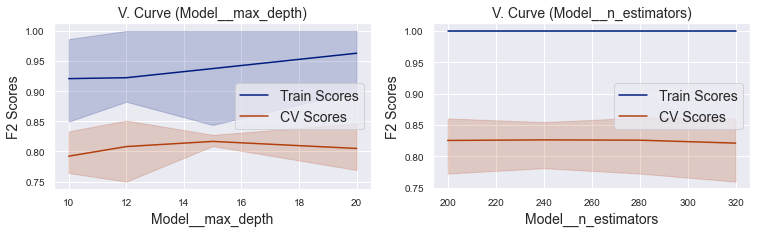

In [68]:
# plot val curve
def plot_vc(model, X_train, y_train, param_name, param_range,ax):
  train_scores, test_scores = validation_curve(model, X_train, y_train,cv=KFold(shuffle=True,random_state = rstate,n_splits=3), param_name = param_name, param_range = param_range, scoring=f2_score, n_jobs = -1)
  sns.lineplot(x=np.tile(param_range, train_scores.shape[1]), y=train_scores.flatten(), ax = ax, label = 'Train Scores')
  sns.lineplot(x=np.tile(param_range, test_scores.shape[1]), y=test_scores.flatten(), ax = ax,label = 'CV Scores')
  ax.set_title(f"V. Curve ({param_name})")
  ax.set_ylabel("F2 Scores")
  ax.set_xlabel(f"{param_name}")

param_copy = {
  'Model__max_depth' : [10,12,15,20],
  'Model__n_estimators': [200,240,280,320],
  
}

plt.figure(figsize=(16,9))

for i,paramname in zip(range(len(param_copy)), param_copy):
    ax = plt.subplot(3,3,i+1)
    plot_vc(rf_final,X_train,y_train, f'{paramname}',param_copy[paramname],ax )
plt.tight_layout()

## Analysis of hyperparameters:
max_depth | n_estimators| 
:-------------------|:---------------
Can try increase a little more or stay in the same range| Seems pretty consistent, we can maybe further simplify by reducing number of trees

## Hyperparameter tuning

We can attempt to improve and simplify our models, we perform hyperparameter tuning on RandomForest. Here, we can see that we will tune `max_depth` parameter which will help to lower the overfitting risk. 
- We optimize the hyperparameters to find the most optimal hyperparameters, and not make the model too complex
- Tune other general hyperparameters like no. of trees, and `criterion`
- Trees >`few hundreds`, will generally lead to diminishing returns hence we will avoid that
- Tuning of imputation models as well (attempt to find a better imputation method).
- `Bootstrap` set to False because of imbalanced dataset, as bootstrapped samples may not have the minority class.

In [56]:
param = {'Model__max_depth' : [24,26,33,35],
           'Model__n_estimators': [140,150,170,180],
           'Model__bootstrap': [False],
           'Model__criterion':['entropy','gini'],
           'preprocess__Imputation__clf': [DecisionTreeClassifier(random_state=rstate),SVC() ],
           'preprocess__Imputation__reg': [KNeighborsRegressor()]
           }

# Grid search to pick best params.
grid = GridSearchCV(rf_final, param,cv =4 ,n_jobs=-1,scoring=f2_score, verbose=3,return_train_score=True)

def gridFit(gridsearch):
    gridsearch.fit(X_train, y_train)
    print('Best params: %s' % gridsearch.best_params_)
    return gridsearch

fitted_grid = gridFit(grid)
# """
# Best params: {'Model__bootstrap': False, 'Model__criterion': 'entropy', 'Model__max_depth': 24, 'Model__n_estimators': 140, 'preprocess__Imputation__clf': SVC(), 'preprocess__Imputation__reg': KNeighborsRegressor()}
# """

Fitting 4 folds for each of 64 candidates, totalling 256 fits
Best params: {'Model__bootstrap': False, 'Model__criterion': 'entropy', 'Model__max_depth': 24, 'Model__n_estimators': 140, 'preprocess__Imputation__clf': SVC(), 'preprocess__Imputation__reg': KNeighborsRegressor()}


## Threshold picking/tuning
- Since our dataset is imbalanced in this scenario, the original threshold may not work well, hence we will attempt to change the original threshold to the optimal threshold value. We will use `predict_proba` to obtain the probability of the prediction. Using the new threshold, we will attempt to evaluate model on an independant test set.

In [75]:
from sklearn.base import clone
rf_final2 = Pipeline([
    ('preprocess', preprocess),
    ('FS', SelectKBest(f_classif,k=8) ),
    ('Scaler', StandardScaler() ),
    ('Model', RandomForestClassifier(random_state=rstate))
])

rf_final2.set_params(**fitted_grid.best_params_)

def custom_cross_val_predict(
        mod, X, y,thresh, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=rstate) ):
    pred = {'Scores':[], 'Threshold':[]}
    for train, test in cv.split(X,y):
        for i in thresh:
            m = clone(mod)
            # Fit on train
            m.fit(X.iloc[train, :], y.iloc[train])
            y_preds = (m.predict_proba(X.iloc[test, :])[:,1] >= i).astype(bool)
            pred['Scores'].append(fbeta_score(y.iloc[test] , y_preds , beta = 2))
            pred['Threshold'].append(i)
    return pd.concat([pd.DataFrame(pred).groupby('Threshold')['Scores'].mean().to_frame(),pd.DataFrame(pred).groupby('Threshold')['Scores'].std().to_frame()],axis=1 )

score_thresh = custom_cross_val_predict(rf_final2,X_train,y_train, [0.55,0.25,0.45,])
display(score_thresh)

,Scores,Scores
Threshold,,
0.25,0.897853,0.032202
0.45,0.877258,0.051860
0.55,0.861897,0.064347


Pick .45 as it has higher score and slightly closer to the original 0.5. This method can generally help as machine failure is considered a phenomenom. And it has generally helped our f2 scores.
- Default threshold place same importance on precision and recall, by lowering it, we want to ensure that it is crucial to identify machines that fail

Pick .45 finally.

In [76]:
rf_final2.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('Encode',
                                  FunctionTransformer(func=<function encodeOrdinal at 0x000002781A44EA60>)),
                                 ('Imputation',
                                  Imputation(clf=SVC(),
                                             reg=KNeighborsRegressor())),
                                 ('Power',
                                  AdditionalFeature(col1='Torque (Nm)',
                                                    col2='Rotation Speed (rpm)',
                                                    operator=None,
                                                    prod='Power')),
                                 ('Temp diff',
                                  AdditionalFeature(col1='Process T (C)',
                                                    col2='Ambie...
                                  ColumnTransformer(remainder='passthrough',
                                          

# Random Forest Classifier Evaluation
- Random forest classifier will be our final model.
- **Use of a picked threshold .45**
- Using the best hyperparameters by `GridSearchCV` we will attempt to evaluate the model on an unseen set

1. Final evaluation of model on unseen set
1. By visualising a confusion matrix, we can see how many of a classifier’s predictions were correct and incorrect.
Values on the diagonal represent the number of times where the predicted label matches the true label. Values in other cells indicate instances where the model misclassified observations
2. Both confusion matrix and classification report helps us have a deeper understanding of how the model performs

[[3859    5]
 [   0  136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3864
           1       0.96      1.00      0.98       136

    accuracy                           1.00      4000
   macro avg       0.98      1.00      0.99      4000
weighted avg       1.00      1.00      1.00      4000

Recall score with best params:  1.0
Precision Score with best params 0.9645390070921985
F2 Score: 0.99


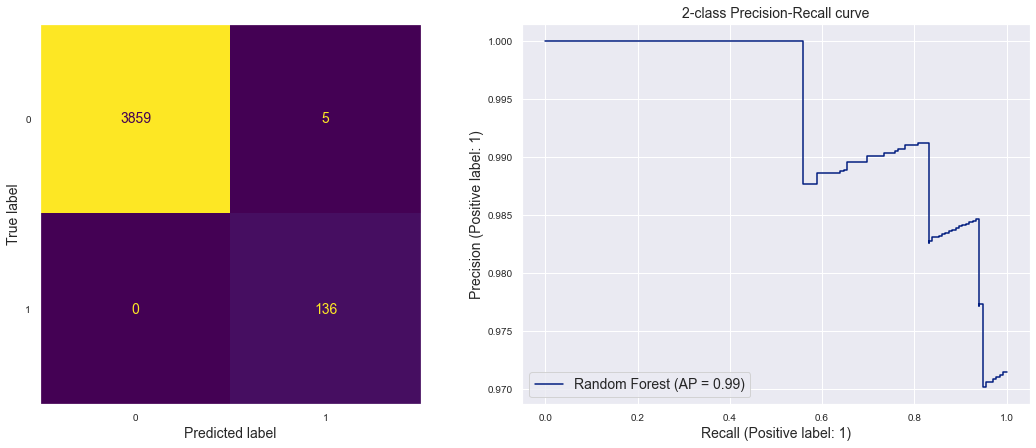

In [74]:
# Prints summary report.
def summaryReport(gridsearch):
    # Applying a threshold for prediction
    y_pred= (gridsearch.predict_proba(X_test)[:,1] >= 0.45).astype(bool) 
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(classification_report(y_test, y_pred))
    # print('Accuracy score', accuracy_score(y_test, y_pred))
    print('Recall score with best params: ',recall_score(y_test, y_pred))
    print('Precision Score with best params', precision_score(y_test,y_pred))
    # print('F1 Score: %.2f'% f1_score(y_true= y_test, y_pred = y_pred ))
    print('F2 Score: %.2f' % fbeta_score(y_true= y_test, y_pred =y_pred,beta=2))
    # plotting confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, (ax11, ax22) = plt.subplots(1,2, figsize=(20,7))
    disp.plot(ax=ax11)
    disp.im_.colorbar.remove()
    
    ax11.grid(False)

    disp2 = PrecisionRecallDisplay.from_estimator(
        fitted_grid, X_test, y_test, name="Random Forest",ax=ax22
    )
    _ = disp2.ax_.set_title("2-class Precision-Recall curve")
    

    plt.show()
    return y_pred,cm,gridsearch
y_hat,cMatrix,gsrch = summaryReport(rf_final2)

### Errors the model make?
- Most errors the model makes is that the model predicts machine of failure status, but in actual fact, the machine is actually of normal status.
- We have managed to achieve a high $F_2$ score on an unseen test set. As seen from confusion matrix and report, we achieved an excellent recall score, which is really crucial in our scenario. Moreover, we managed to balanced the precision-recall trade-off. As seen from the independant test, our model is able to predict machines that fail accurately and is able to generalize well.
We can now be rest assured that the model is identifying observations of a class, and not finding shortcuts. (predicting everything as an observation of majority class)

### Example of a tree

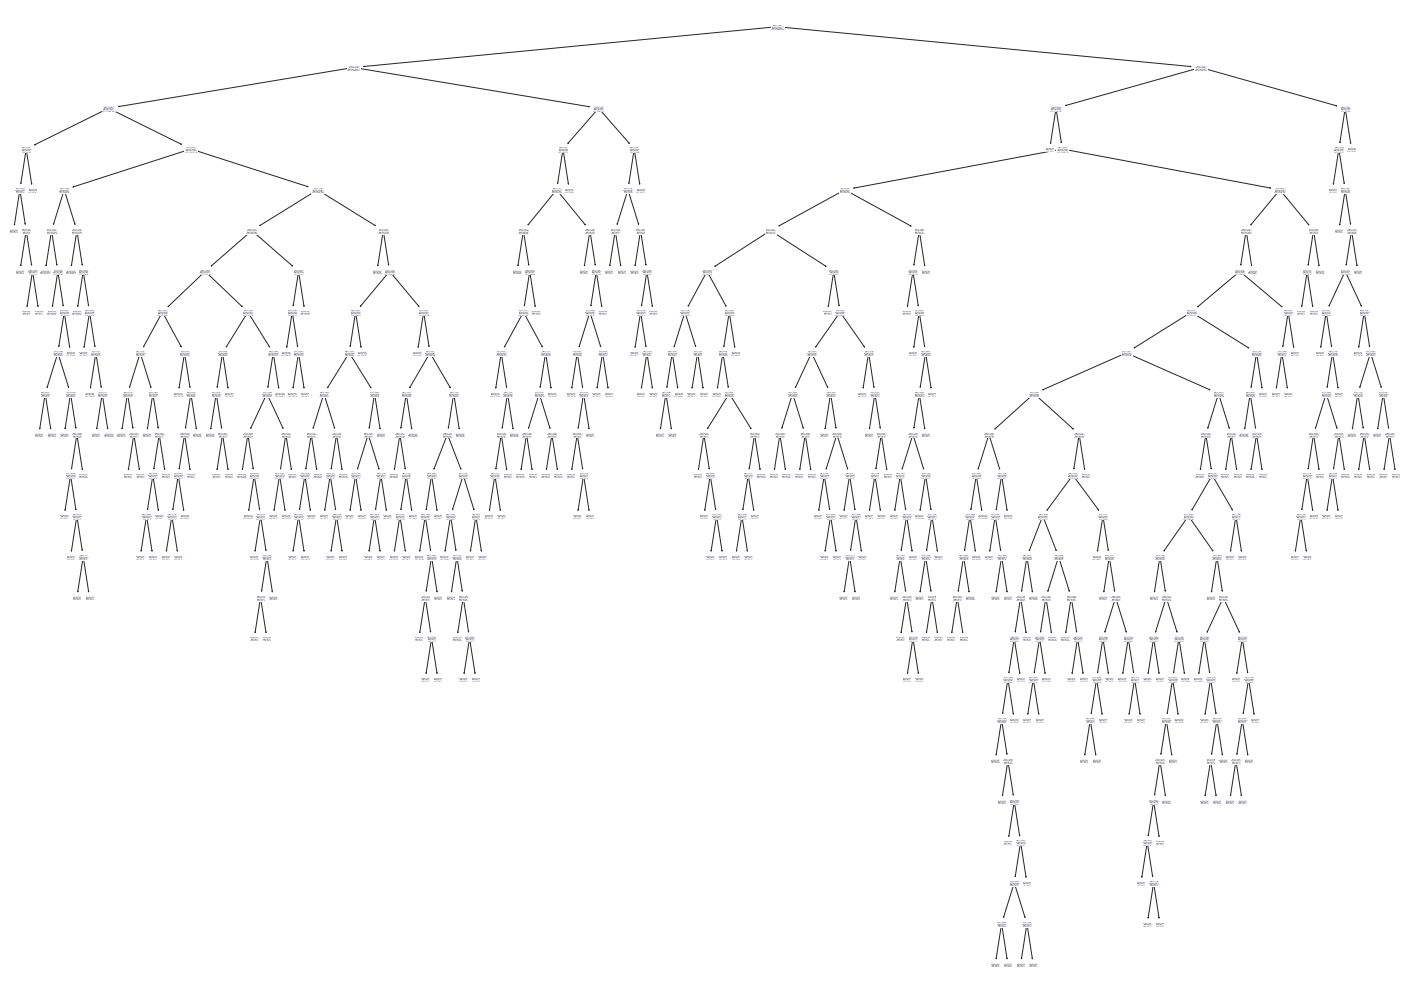

In [77]:
fig, ax = plt.subplots(figsize=(25, 18))
plot_tree(rf_final2['Model'].estimators_[50], ax=ax)
plt.show()

## Feature Importances
- RandomForest Classifier does provide its importance of features which is important for interpretability.
- We can see that rotation speed and power are the best features given its high feature importance, which suggests its high relevance by the model, suggesting that feature engineering was useful.
- Insight: Power, rotation speed and torque are very relevant in deciding the status of factory machines
- `Quality` is not very important as suggested by model

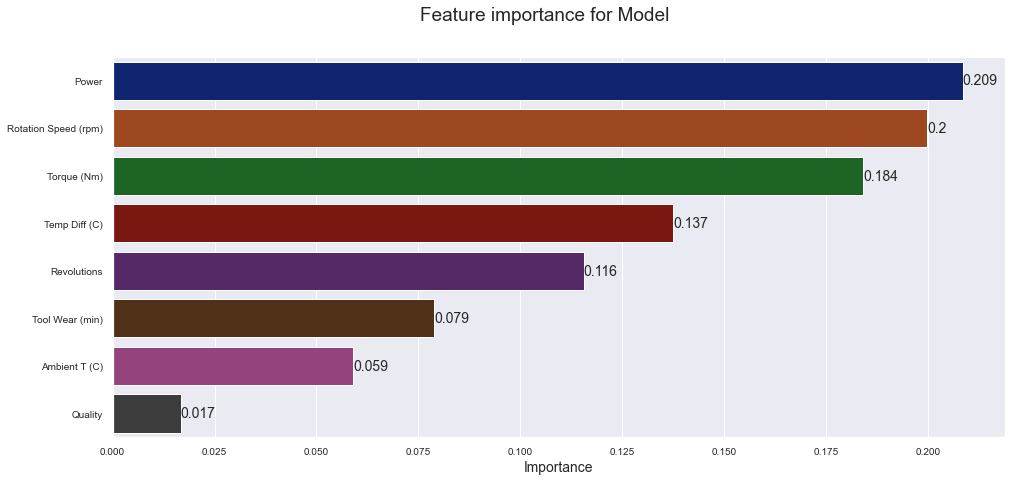

,Importance
Power,0.209
Rotation Speed (rpm),0.200
Torque (Nm),0.184
Temp Diff (C),0.137
Revolutions,0.116
Tool Wear (min),0.079
Ambient T (C),0.059
Quality,0.017


In [77]:
# Feature importances
fig5, ax5 = plt.subplots(figsize=(16, 7))
idx = ['Tool Wear (min)','Quality', 'Ambient T (C)', 'Rotation Speed (rpm)', 'Torque (Nm)', 'Power', 'Temp Diff (C)', 'Revolutions']
importance = pd.DataFrame(gsrch.named_steps["Model"].feature_importances_,index=idx,columns=['Importance'])
sortidx= pd.DataFrame(importance['Importance'].sort_values(ascending=False)).index
lbl = importance['Importance'].sort_values(ascending=False).round(3)
sns.barplot(data=importance,x='Importance',y = idx,order= sortidx).bar_label(container=ax5.containers[0], labels=lbl)

fig5.suptitle('Feature importance for Model', fontsize=19)
plt.show()
pd.DataFrame(lbl)

## Saving model using joblib

In [79]:
import joblib
joblib.dump(rf_final2, 'RF.pkl')

['RF.pkl']

## Conclusion:
We have successfully developed a binary classification model. Moreover, a model with high bias is limited from learning the true trend, hence underfitting, while high variance overfits the training data. We managed to overcome the bias-variance trade-off and our model sits somewhere between the 2 extremes. Moreover, along with extensive feature engineering and model improvement attempts, we managed to obtain a relatively near perfect $F_2$ score. Through extensive research about common problems about classification problems, i have also managed to gain more insights on imbalanced datasets, and how to handle them.

References: 
1. https://tulip.co/blog/machine-learning-in-manufacturing-an-introduction-to-industrial-ai/
2. https://limblecmms.com/blog/equipment-failure/
3. https://www.assemblymag.com/articles/96518-equipment-failure-is-costly-for-manufacturers
4. [API design for machine learning software: experiences from the scikit-learn project](https://scikit-learn.org/stable/), Buitinck et al., 2013.
5. https://towardsdatascience.com/how-to-implement-machine-learning-for-predictive-maintenance-4633cdbe4860
